In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns

In [3]:
boston_data = load_boston()
df= pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df["Target"] = pd.Series(boston_data.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.shape

(506, 14)

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

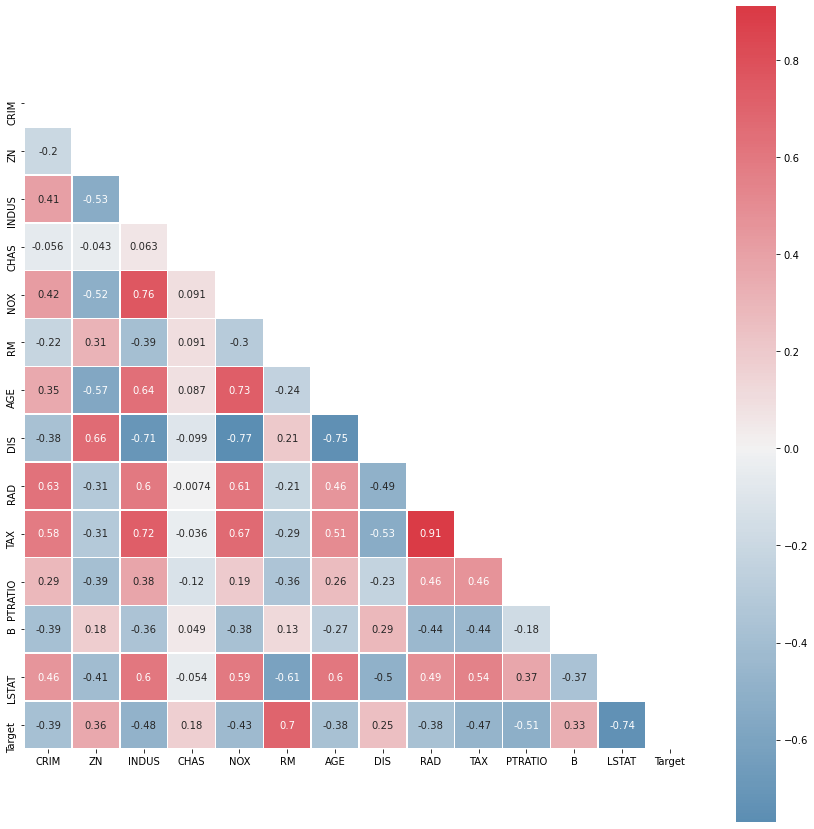

In [8]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

In [9]:
df = df.drop(columns="RAD",axis=1)

<AxesSubplot:xlabel='Target', ylabel='Count'>

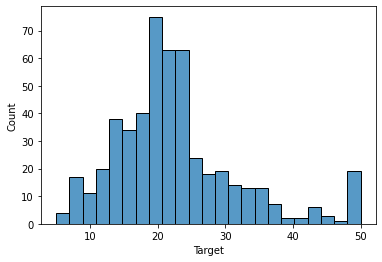

In [12]:
sns.histplot(data=df,x="Target")

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(["Target"], axis=1)
y = df["Target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train_1 = X_train[["LSTAT"]].copy()
X_test_1 = X_test[["LSTAT"]].copy()

# REGRESION LINEAL

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()
reg.fit(X_train_1, y_train)

LinearRegression()

In [37]:
reg.score(X_train1, y_train)

0.5423180734793516

In [38]:
reg.score(X_test_1, y_test)

0.5429180422970386

In [39]:
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)

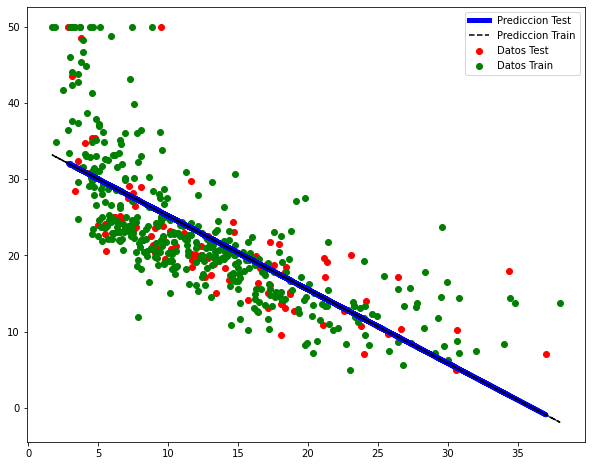

In [40]:
plt.figure(figsize = (10,8))

plt.scatter(X_test_1, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test_1, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train_1, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train_1, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()

In [41]:
X_train_2 = X_train[["LSTAT", "RM"]].copy()
X_test_2 = X_test[["LSTAT", "RM"]].copy()

In [42]:
reg = LinearRegression().fit(X_train_2, y_train)

In [43]:
reg.score(X_train_2, y_train)

0.6501592679428922

In [44]:
reg.score(X_test_2,y_test)

0.5739577415025858

In [45]:
reg = LinearRegression().fit(X_train, y_train)

In [46]:
reg.score(X_train, y_train)

0.7432668146680894

In [47]:
reg.score(X_test, y_test)

0.639034773895143

In [48]:
reg.coef_

array([-8.13528576e-02,  2.20901901e-02, -1.49860929e-02,  3.12973863e+00,
       -1.55478394e+01,  4.72661372e+00, -9.59697735e-03, -1.42851306e+00,
        9.65690007e-04, -8.15257437e-01,  1.16253689e-02, -4.96644948e-01])

In [49]:
reg.intercept_

24.260870103153458

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
y_test_pred = reg.predict(X_test)
mean_squared_error(y_test,y_test_pred)

26.470945619590534

# ARBOL REGRESION

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
max_depths = np.arange(1, 20)
train_scores = []
test_scores = []

In [56]:
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i)
    
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_scores.append(mean_squared_error(y_train,y_train_pred))
    test_scores.append(mean_squared_error(y_test,y_test_pred))

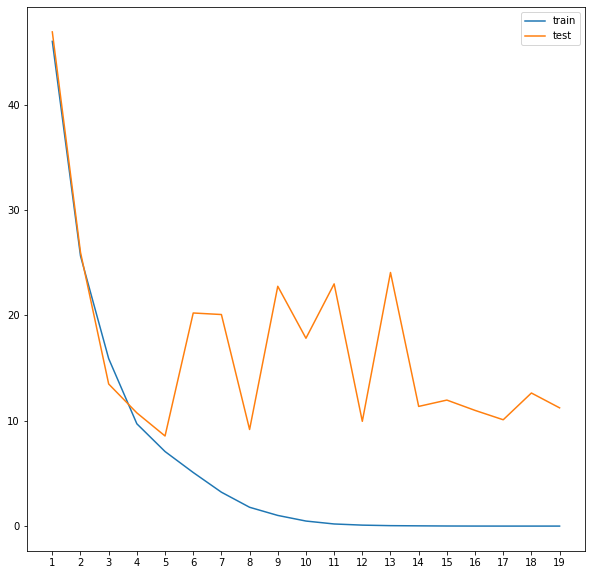

In [58]:
plt.figure(figsize=(10,10))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xticks(max_depths)
plt.legend()

In [60]:
tree = DecisionTreeRegressor(max_depth=5)

tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)



In [61]:
mean_squared_error(y_train, y_train_pred)

7.078696760120875

In [63]:
mean_squared_error(y_test, y_test_pred)

8.553906584646844

# KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [67]:
K = np.arange(1, 20)
train_scores = []
test_scores = []

In [69]:
for i in K:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

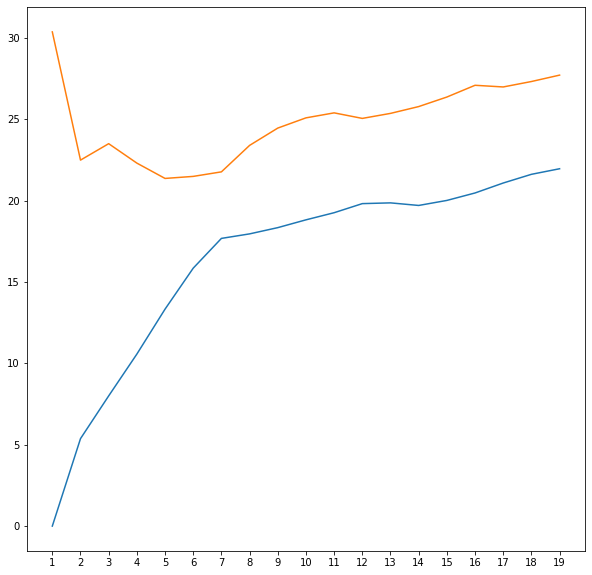

In [71]:
plt.figure(figsize=(10,10))
plt.plot(max_depths, train_scores, label="Train")
plt.plot(max_depths, test_scores, label="Test")
plt.xticks(max_depths)
plt.show()

In [72]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

15.848281078107808
21.486181917211326


In [74]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

17.676533138007677
21.764771908763507


In [75]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

18.816581930693072
25.082438235294127
